<a href="https://colab.research.google.com/github/SrinjoySaha/DataAnalysis/blob/main/HotelBooking_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Importing the Dataset


In [2]:
data = pd.read_csv('/content/hotel_bookings.csv.csv')

#Exploratory Data Analysis and Data Cleaning

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,No Deposit,NaN,NaN,0.0,Transient,0.0,0.0,0.0,Check-Out,1/7/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,NaN,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,No Deposit,304.0,NaN,0.0,Transient,75.0,0.0,0.0,Check-Out,2/7/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,No Deposit,240.0,NaN,0.0,Transient,98.0,0.0,1.0,Check-Out,3/7/2015


In [4]:
data.shape

(43946, 32)

In [5]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43946 entries, 0 to 43945
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43946 non-null  object 
 1   is_canceled                     43945 non-null  float64
 2   lead_time                       43945 non-null  float64
 3   arrival_date_year               43945 non-null  float64
 4   arrival_date_month              43945 non-null  object 
 5   arrival_date_week_number        43945 non-null  float64
 6   arrival_date_day_of_month       43945 non-null  float64
 7   stays_in_weekend_nights         43945 non-null  float64
 8   stays_in_week_nights            43945 non-null  float64
 9   adults                          43945 non-null  float64
 10  children                        43941 non-null  float64
 11  babies                          43945 non-null  float64
 12  meal                            

In [7]:
#Convert the date to DateTime format.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [8]:
data.describe(include= 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,43946,43945,43945,43481,43945,43945,43945,43945,43945,43945,43945
unique,3,12,5,126,7,5,10,12,3,4,3
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,40060,6472,32822,19796,18830,32247,27040,19923,41765,31502,31602


In [10]:
for col in data.describe(include= 'object').columns:
  print(col)
  print(data[col].unique())
  print('-'*50)

hotel
['Resort Hotel' 'City Hotel' 'City']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June' nan]
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined' nan]
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA'

In [14]:
data.isnull().sum()

hotel                               0
is_canceled                         1
lead_time                           1
arrival_date_year                   1
arrival_date_month                  1
arrival_date_week_number            1
arrival_date_day_of_month           1
stays_in_weekend_nights             1
stays_in_week_nights                1
adults                              1
children                            5
babies                              1
meal                                1
country                           465
market_segment                      1
distribution_channel                1
is_repeated_guest                   1
previous_cancellations              1
previous_bookings_not_canceled      1
reserved_room_type                  1
assigned_room_type                  1
booking_changes                     1
deposit_type                        1
days_in_waiting_list                1
customer_type                       1
adr                                 1
required_car

In [15]:
#We remove the column agent since it is of no relevance to us.
#Also remove the column company since we would not be able to handle such huge data in normal python code. We require BigData library for that.

data.drop({'agent','company'}, axis=1, inplace=True)

In [16]:
#Now drop the null values
data.dropna(inplace=True)

In [17]:
#Check the dataFrame for any other discrepency
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [18]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.00000,43477.000000,43477.000000,43477.000000,43477.000000
mean,0.282770,89.405203,2016.023530,27.841111,15.769855,1.164064,3.044138,1.869793,0.123606,0.013271,0.040803,0.092808,0.118453,0.27840,0.534582,94.779535,0.126205,0.602318
std,0.450351,94.754718,0.760623,13.539555,8.791673,1.128373,2.389668,0.677570,0.437715,0.116033,0.197836,1.281522,0.892769,0.71722,7.274189,59.654304,0.337852,0.809481
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.100000,0.000000,0.000000
50%,0.000000,55.000000,2016.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,77.400000,0.000000,0.000000
75%,1.000000,146.000000,2017.000000,38.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,20.00000,185.000000,508.000000,8.000000,5.000000


We observe a huge variation in the adr values for some data.

<AxesSubplot:>

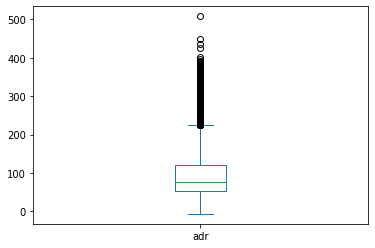

In [19]:
#We plot a graph to understand the difference
data['adr'].plot(kind = 'box')

In [20]:
#We filter the adr and create a new dataframe by removing the outliers
data[data['adr'] < 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,C,3.0,No Deposit,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-01-07
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,C,4.0,No Deposit,0.0,Transient,0.0,0.0,0.0,Check-Out,2015-01-07
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,C,0.0,No Deposit,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-02-07
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,A,0.0,No Deposit,0.0,Transient,75.0,0.0,0.0,Check-Out,2015-02-07
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,A,0.0,No Deposit,0.0,Transient,98.0,0.0,1.0,Check-Out,2015-03-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43940,City Hotel,1.0,88.0,2015.0,September,39.0,26.0,2.0,2.0,2.0,...,A,0.0,Non Refund,0.0,Transient,170.0,0.0,0.0,Canceled,2015-08-21
43941,City Hotel,1.0,88.0,2015.0,September,39.0,26.0,2.0,2.0,2.0,...,A,0.0,Non Refund,0.0,Transient,170.0,0.0,0.0,Canceled,2015-09-09
43942,City Hotel,1.0,88.0,2015.0,September,39.0,26.0,2.0,2.0,2.0,...,A,0.0,Non Refund,0.0,Transient,170.0,0.0,0.0,Canceled,2015-08-21
43943,City Hotel,1.0,88.0,2015.0,September,39.0,26.0,2.0,2.0,2.0,...,A,0.0,Non Refund,0.0,Transient,170.0,0.0,0.0,Canceled,2015-08-21


In [21]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.000000,43477.00000,43477.000000,43477.000000,43477.000000,43477.000000
mean,0.282770,89.405203,2016.023530,27.841111,15.769855,1.164064,3.044138,1.869793,0.123606,0.013271,0.040803,0.092808,0.118453,0.27840,0.534582,94.779535,0.126205,0.602318
std,0.450351,94.754718,0.760623,13.539555,8.791673,1.128373,2.389668,0.677570,0.437715,0.116033,0.197836,1.281522,0.892769,0.71722,7.274189,59.654304,0.337852,0.809481
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2015.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,53.100000,0.000000,0.000000
50%,0.000000,55.000000,2016.000000,30.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,77.400000,0.000000,0.000000
75%,1.000000,146.000000,2017.000000,38.000000,23.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,121.500000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,20.00000,185.000000,508.000000,8.000000,5.000000


# Data Analysis and Visualisation

In [34]:
#We want the data for the Reservation which has been cancelled and the one which is not yet cancelled.
reservation_cancelled_perc = data['is_canceled'].value_counts(normalize = True)
reservation_cancelled_perc

0.0    0.71723
1.0    0.28277
Name: is_canceled, dtype: float64

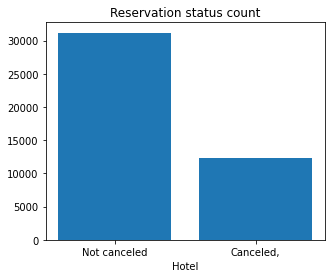

In [38]:
#We now plot the figure to get an idea about the cancellation
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled,'], data['is_canceled'].value_counts())
plt.show()

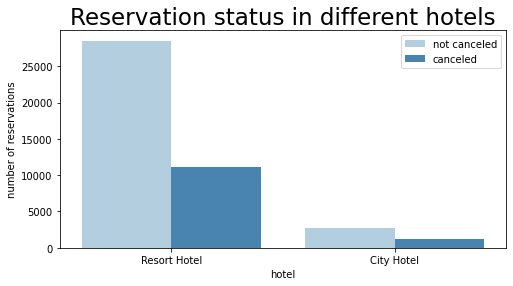

In [42]:
plt.figure(figsize = (8,4))
ax1= sns.countplot(x = 'hotel', hue = 'is_canceled', data = data, palette = 'Blues')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status in different hotels', size = 23)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()


In [40]:
#Resort Hotel
resort_hotel = data[data['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0.0    0.72025
1.0    0.27975
Name: is_canceled, dtype: float64

In [44]:
#City Hotel
city_hotel = data[data['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0.0    0.686421
1.0    0.313579
Name: is_canceled, dtype: float64

In [45]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

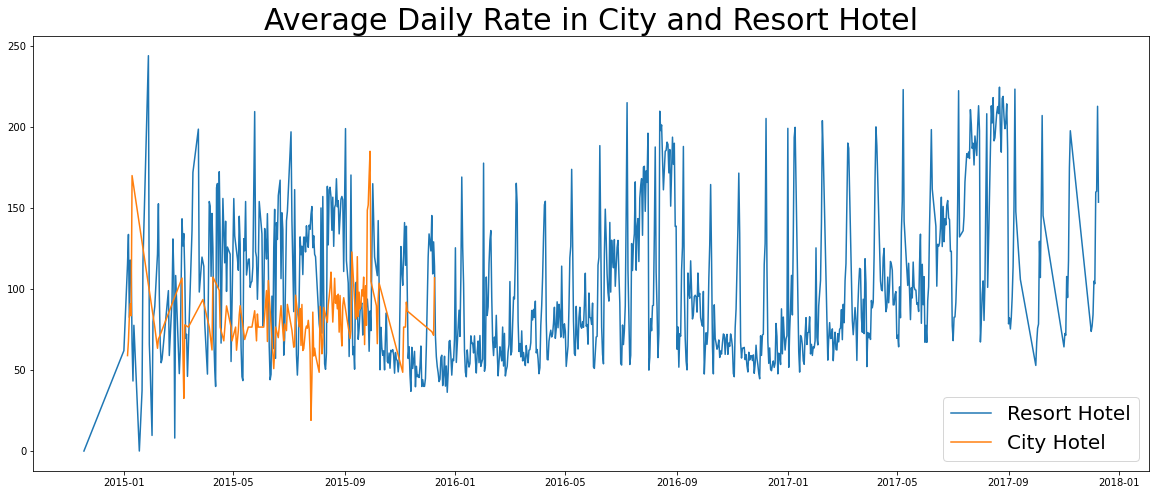

In [46]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

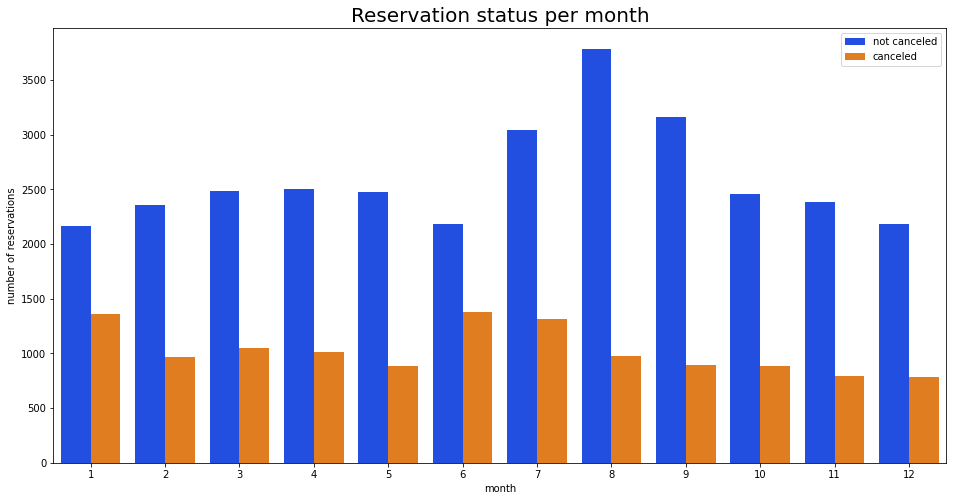

In [48]:
data['month'] = data['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = data, palette = 'bright')
legend_labels,_ = ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

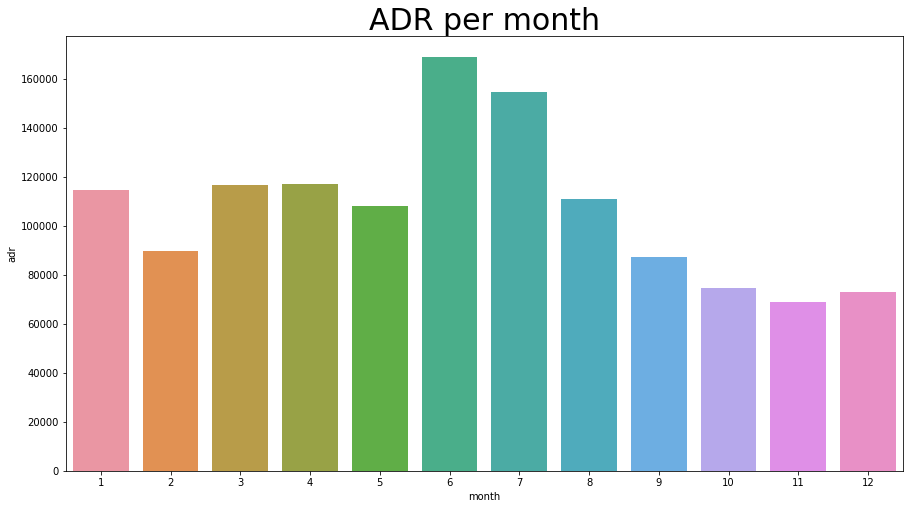

In [49]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot('month', 'adr', data = data[data['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

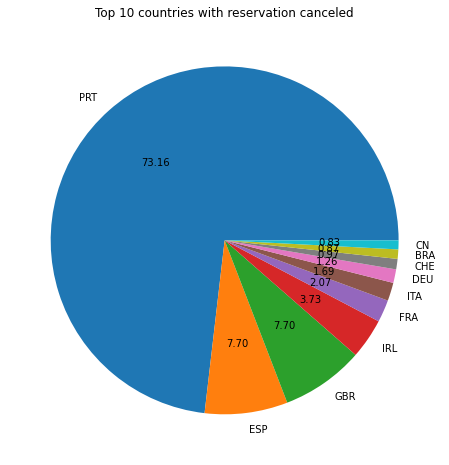

In [50]:
cancelled_data = data[data['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [51]:
data['market_segment'].value_counts()

Online TA        18755
Offline TA/TO     8423
Groups            7089
Direct            6705
Corporate         2275
Complementary      230
Name: market_segment, dtype: int64

In [53]:
data['market_segment'].value_counts(normalize = True)

Online TA        0.431378
Offline TA/TO    0.193735
Groups           0.163052
Direct           0.154219
Corporate        0.052327
Complementary    0.005290
Name: market_segment, dtype: float64

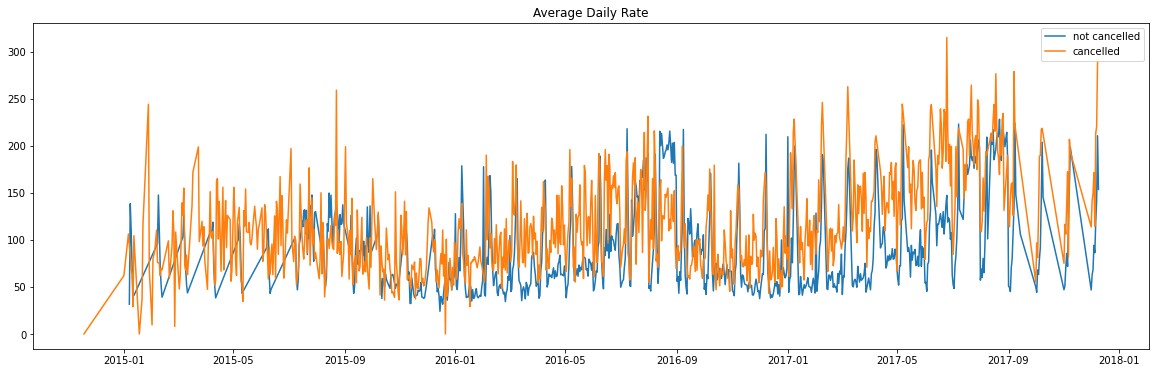

In [55]:
cancelled_data_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_data_adr.reset_index(inplace = True)
cancelled_data_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data = data[data['is_canceled'] == 0]
not_cancelled_data_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_data_adr.reset_index(inplace = True)
not_cancelled_data_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_data_adr['reservation_status_date'],not_cancelled_data_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_data_adr['reservation_status_date'],cancelled_data_adr['adr'], label = 'cancelled')
plt.legend()